In [2]:
#Netid: aadcosta
#Seating Pin : 79
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
# Load your dataset (replace 'data.csv' with your actual data file)
data = pd.read_csv('E:\MS\MS_studies\Sem_2\IntrotoML\HW2\\71-80.csv')

In [5]:
# Select appropriate columns
selecteddata = data.iloc[:, [0,3,4,5,6,7,8]]
#To prevent warnings
selecteddata = selecteddata.copy()
# Remove columns 
#selecteddata.loc[:, 'cit_2017'] = selecteddata.loc[:, 'cit_2017'].str.replace(',', '').astype(float)
y_df = data.iloc[:,[9]]
# for col in selecteddata.columns:
#     selecteddata[col] = selecteddata[col].str.replace(',', '').astype(float)

In [6]:
print(selecteddata.info)
df = selecteddata.values
df.shape

<bound method DataFrame.info of     univ_rank  cit_2017  cit_2018  cit_2019  cit_2020  cit_2021  cit_2022
0          71       104        99       104        90        70        65
1          71        64        75        63        47        59        47
2          71       840       699       668       576       631       613
3          71        43        57        80        92        81        81
4          71         8        60        31       102       134       202
..        ...       ...       ...       ...       ...       ...       ...
95         80       442       443       404       355       385       333
96         80      1307      1557      1814      1958      1926      1827
97         80       493       520       450       474       412       338
98         80        37        30        51        53        67        53
99         80         0         2        10        34       103       156

[100 rows x 7 columns]>


(100, 7)

In [7]:
# Normalize data to remove maximum edge values
scaler = StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)

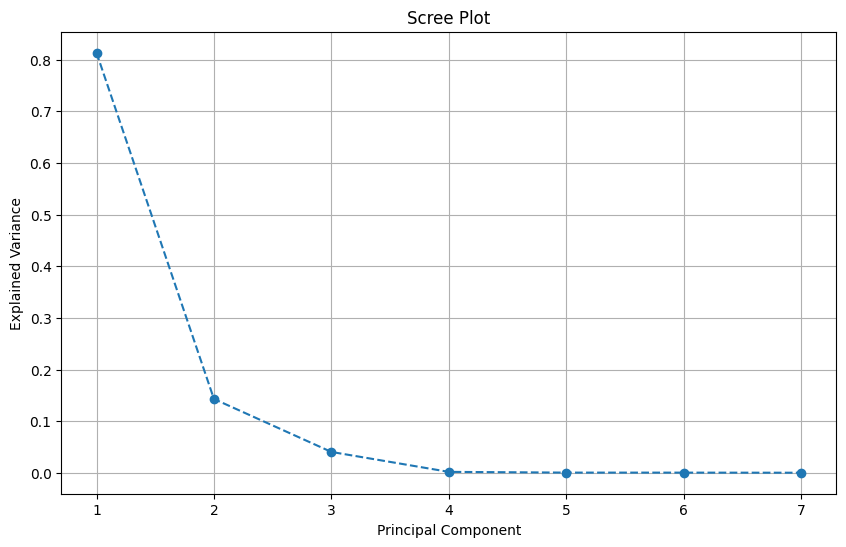

In [8]:
# Create a PCA model with all the features
pca = PCA()
pca.fit(X_scaled)  # X is your data

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()



The number of components that will capture maximum variance is 2 as you can see the point of inflexion (point where slope changes most)
is 2. 

explained_variance = eigenvalues[i] / sum(eigenvalues)

np.arrange(1,len(explained_variance)+1) will be plotted across x axis, it represents the no of principal components


In [9]:
# PCA for selecting 2 components
pca_hindex = PCA(n_components=2)
principalComponents_hindex = pca_hindex.fit_transform(X_scaled)

In [10]:
# Calculate quartiles for the target variable
quartiles = np.percentile(data['h_index'], [25, 50, 75])

In [11]:
# Logic for assigning quartiles for target variable
dfnew = y_df.copy()

def quartileconvert(row):
    
# Assign colors based on quartiles
    if row <= quartiles[0]:
        return 'red'
    elif quartiles[0] < row <= quartiles[1]:
        return 'orange'
    elif quartiles[1] < row <= quartiles[2]:
        return 'green'
    else:
        return 'blue'

dfnew['colors'] = y_df['h_index'].apply(quartileconvert)


In [12]:
colorlist = []
for value in data['h_index']:
    if value <= quartiles[0]:
        colorlist.append('red')
    elif quartiles[0] < value <= quartiles[1]:
        colorlist.append('orange')
    elif quartiles[1] < value <= quartiles[2]:
        colorlist.append('green')
    else:
        colorlist.append('blue')

In [13]:
dfnew = dfnew.drop(['h_index'],axis = 1)

In [14]:
dfnew

,colors
0,orange
1,green
2,blue
3,orange
4,red
...,...
95,blue
96,green
97,blue
98,red


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


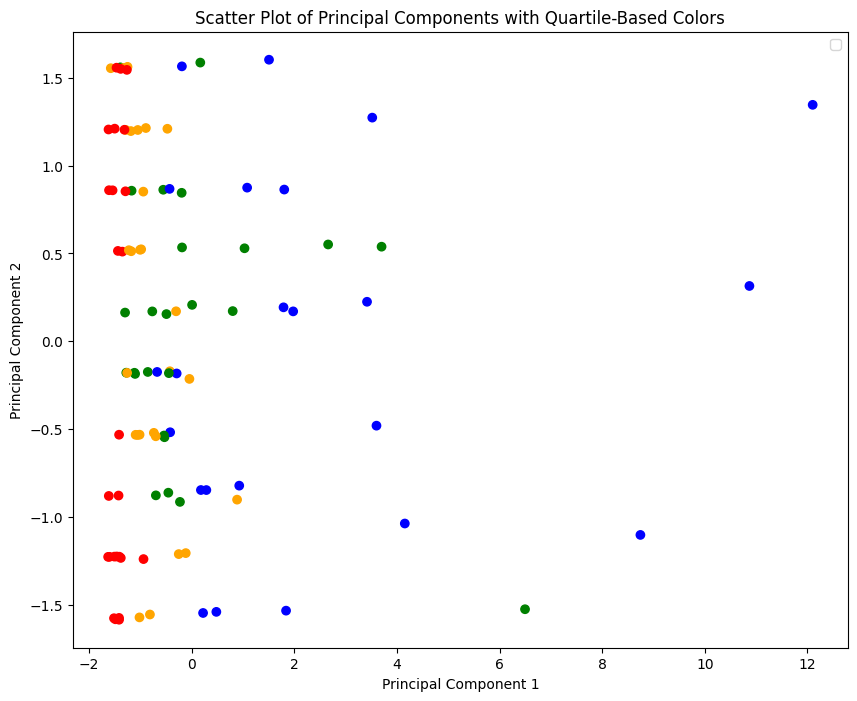

In [15]:
# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(principalComponents_hindex[:, 0], principalComponents_hindex[:, 1], c=colorlist)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components with Quartile-Based Colors')
plt.legend()
plt.show()


Correlation Assessment: The positioning of quartiles on the PCA plot can help you assess whether there is a 
correlation or relationship between the target variable and the principal components. If you observe that certain quartiles 
tend to cluster in specific regions of the plot,it suggests that the principal components capture variations associated with the target variable.

Variations required for the target variable are captured the most by the PCA component 1. Further explanations can be found in the Report.pdf